<a href="https://colab.research.google.com/github/wojciechsadlik/MGU-CGANMusicConverter/blob/main/raw_audio_gan_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/Colab Notebooks/MGU-CGANMusicConverter

/content/drive/MyDrive/Colab Notebooks/MGU-CGANMusicConverter


In [3]:
import keras

generator = keras.models.load_model('generator.h5')

In [8]:
LATENT_DIM = 98
AUDIO_LENGTH = 110250

In [11]:
import numpy as np
noise = np.random.normal(0, 1, (1, LATENT_DIM))
gen_sample = generator.predict(noise)
gen_sample = gen_sample.reshape(AUDIO_LENGTH, 1)

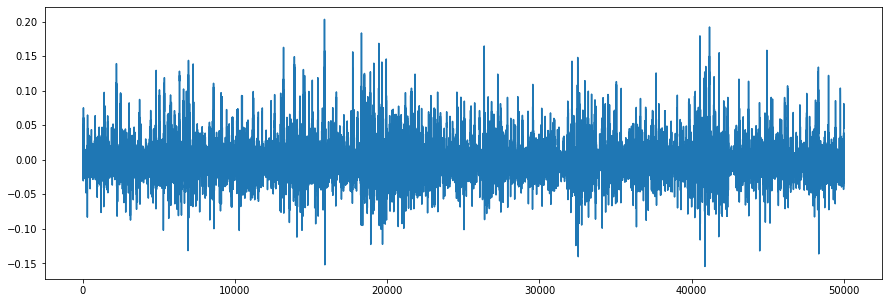

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,5))
plt.plot(gen_sample[50100 : 100100])
plt.show()

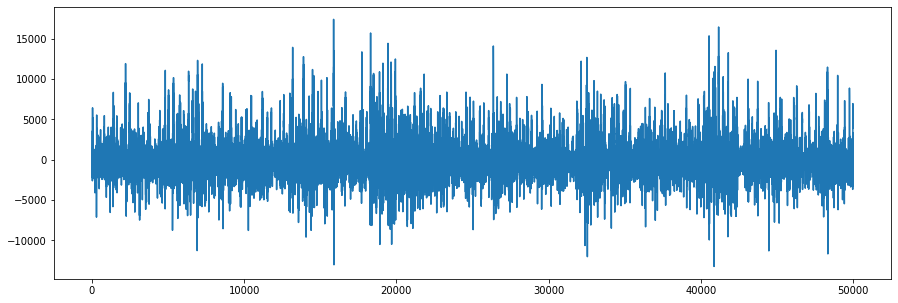

In [20]:
from scipy.io.wavfile import write

scaled = np.int16(gen_sample/np.max(np.abs(gen_sample)) * 32767)
plt.figure(figsize=(15,5))
plt.plot(scaled[50100 : 100100])

In [ ]:
write('test.wav', 22050, scaled)